# Notebook 01: Data Preprocessing & Exploratory Data Analysis (EDA)




## Objective

The purpose of this notebook is to perform a thorough **preprocessing and exploratory data analysis (EDA)** on the Spotify User Behavior Dataset. This forms the foundational step in our user segmentation and modeling pipeline.

---

### Goals of This Notebook

1. **Load and inspect the dataset**
   - Understand the structure, data types, and size of the dataset
   - Identify missing values, duplicate entries, or data entry issues

2. **Clean and preprocess**
   - Handle missing values and inconsistent formats
   - Convert categorical variables to meaningful types
   - Standardize column names if needed

3. **Explore individual features**
   - Visualize distributions of numerical and categorical features
   - Summarize key statistics (e.g., age distribution, listening time slots)

4. **Bivariate and group-wise analysis**
   - Compare behavioral traits across Free vs. Premium users
   - Identify interesting patterns in music vs. podcast preferences

5. **Detect patterns and correlations**
   - Cross-tabulations and grouping to detect trends
   - Correlation analysis (if applicable for numerical fields)

6. **Flag potential features for modeling**
   - Mark high-variance, informative variables
   - Identify categorical variables suitable for encoding
   - Spot redundant or low-informative features

---

### Expected Outcome

By the end of this notebook, we will have:

- A **cleaned and analysis-ready dataset** with standardized formats
- A set of **initial insights** into user behavior on Spotify
- A clear understanding of **important predictors** for future modeling
- Visualizations to support **segment-level patterns** (e.g., Free vs Premium users, Music vs Podcast listeners)

This will set the stage for user segmentation, predictive modeling, and actionable recommendations in subsequent notebooks.


## Loading the dataset and inspecting each column

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [89]:

spotify_data_raw = pd.read_excel("../datasets/raw/spotify_data.xlsx")

In [90]:

print(f"Dataset shape: {spotify_data_raw.shape}")

Dataset shape: (520, 20)


In [91]:

spotify_data_raw.head(10)

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
5,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,NaN,NaN,NaN,NaN,Ok
6,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,NaN,NaN,NaN,NaN,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied
8,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","Playlists, Radio",4,Rarely,Comedy,Story telling,Well known individuals,Shorter,Satisfied
9,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Never,NaN,NaN,NaN,NaN,Ok


In [92]:

spotify_data_raw.columns = spotify_data_raw.columns.str.lower()
column_names=list(spotify_data_raw.columns)
print(f"Column names: {column_names}")


Column names: ['age', 'gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_influencial_mood', 'music_lis_frequency', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']


In [93]:

spotify_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          520 non-null    object
 1   gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

## Data Preprocessing

Let us pick the first five columns : age,gender,spotify_usage_period,spotify_listening_period,spotify_subscription_plan and make understand them better or make a few changes to them

### Age

In [94]:
# Display unique values in the 'age' column
print(f"Unique Value: {spotify_data_raw['age'].unique()}")
# Count the number of null values in the 'age' column
print(f"Number of null values : {spotify_data_raw['age'].isnull().sum()}")
# Count value counts for the 'age' column
print(f"Value count for each age group  \n{spotify_data_raw['age'].value_counts(dropna=False)}")


Unique Value: ['20-35' '12-20' '35-60' '6-12' '60+']
Number of null values : 0
Value count for each age group  
age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64


We can see there are no missing values and the age is of a categorical data range.Let us convert it to categorical type so it is easier to use for later

In [95]:
# We can see the age groups but they are not in a logical order, so we will convert the 'age' column to an ordered categorical type.
age_order = ["6-12", "12-20", "20-35", "35-60", "60+"]
# Convert 'age' to an ordered categorical type
spotify_data_raw['age'] = pd.Categorical(
    spotify_data_raw['age'],
    categories=age_order,
    ordered=True
)

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\3035775330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


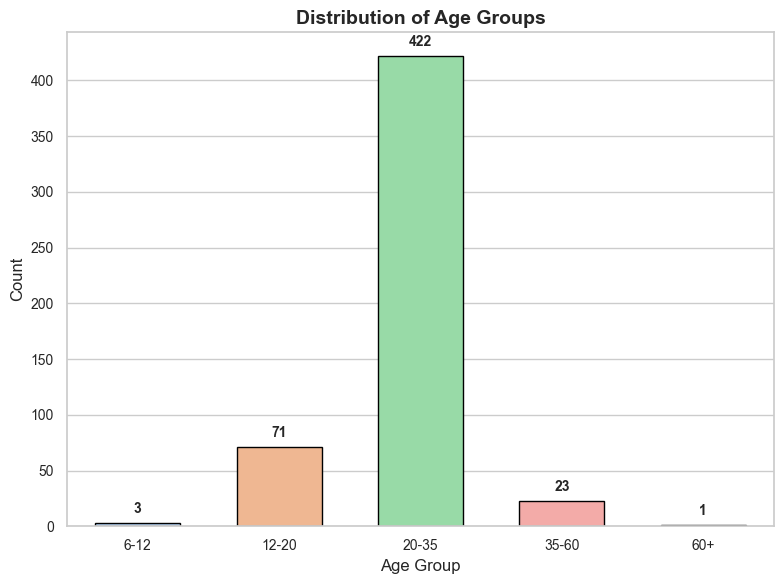

In [96]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=spotify_data_raw,
    x='age',
    order=spotify_data_raw['age'].cat.categories,
    palette='pastel',
    width=0.6,
    edgecolor='black',
    linewidth=1
)
# Add value labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset label slightly above bar
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
# Titles and labels
plt.title('Distribution of Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Majority of Users Are Aged 20–35**
- The 20–35 age group overwhelmingly dominates the dataset, with 422 out of 510+ users (81%).
- This is likely the core demographic for Spotify typically tech-savvy, frequent streamers, and most likely to use music and podcasts for both productivity and leisure.
- It might also be the case that the survey was answered by people of that age and that is why the categories are imbalanced but for our advantage,let us consider the former.

**Younger Users (12–20) Make Up a Moderate Segment**
- 71 users (13.6%) fall in the 12–20 group.
- This segment could represent students and teens who rely more on mobile usage, ad-supported listening, and potentially family subscription plans.


**Older Age Groups Are Underrepresented**
- Only 23 users (4.4%) are in the 35–60 range, and just 1 respondent is 60+.
- This indicates low survey participation or low Spotify adoption in older age brackets possibly due to lower tech affinity or alternative media consumption habits.

**Very Young Users (6–12) Are Minimal**
- With just 3 entries (0.6%), this group is negligible. Most likely, these are children with shared accounts or under parental guidance.


### Gender

Next let us look at the gender column

In [97]:
# Display unique values in the 'gender' column
print(f"Unique Value: {spotify_data_raw['gender'].unique()}")
# Count the number of null values in the 'gender' column
print(f"Number of null values : {spotify_data_raw['gender'].isnull().sum()}")
# Count value counts for the 'age' column
print(f"Value count for each gender group  \n{spotify_data_raw['gender'].value_counts(dropna=False)}")

Unique Value: ['Female' 'Male' 'Others']
Number of null values : 0
Value count for each gender group  
gender
Female    391
Male      114
Others     15
Name: count, dtype: int64


We will convert this to a category again as it would be useful for later

In [98]:
spotify_data_raw['gender'] = spotify_data_raw['gender'].str.strip().str.title()
spotify_data_raw['gender'] = pd.Categorical(
    spotify_data_raw['gender'],
    categories=["Female", "Male", "Others"],
    ordered=False
)

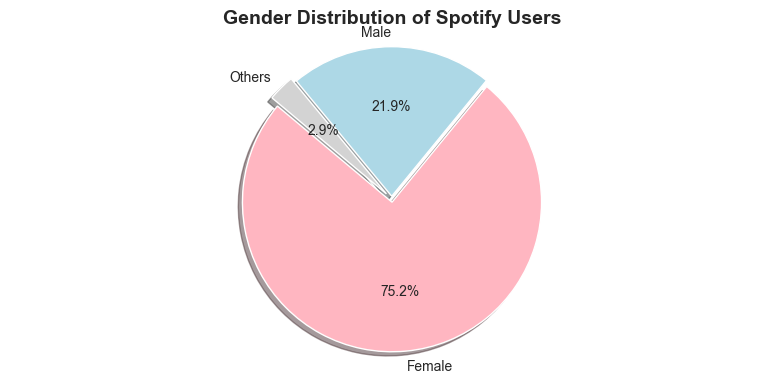

In [ ]:


# Get value counts
gender_counts = spotify_data_raw['gender'].value_counts()

# Define labels and colors
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#FFB6C1', '#ADD8E6', '#D3D3D3']  # pastel pink, blue, gray
explode = [0.05 if label == 'Others' else 0.02 for label in labels]  # pop 'Others' a bit more

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 4))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,         # adds 3D-like shadow
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Title
ax.set_title("Gender Distribution of Spotify Users", fontsize=14, fontweight='bold')

# Equal aspect ratio ensures pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()
plt.show()


**Female respondents are overrepresented**
- Approximately 75% of the respondents identified as female, compared to about 22% male and 3% identifying as others.
- This strong skew suggests the survey attracted significantly more female participants, which may not reflect Spotify's actual global user demographics.

**Male and non-binary representation is limited**
- The male segment is underrepresented, making up just over a fifth of the dataset.
- The "Others" category, while small, indicates that Spotify users include gender-diverse individuals, though insights about this group will be limited due to small sample size.

**Possible sampling bias**
- The data was collected through an independent survey, likely shared through specific networks or communities.
- This means female participation may have been higher due to factors like survey reach, willingness to respond, or topic interest.
- Therefore, gender-based behavioral insights from this dataset should be interpreted with caution and we should not generalize without external validation.


### Usage Period

Let us look at the usage period column

In [100]:
# Let us rename the spotify_usage_period column to 'lifetime_usage' for clarity
spotify_data_raw.rename(columns={'spotify_usage_period': 'lifetime_usage_months'}, inplace=True)

In [101]:

# Display unique values in the 'lifetime_usage' column
print(f"Unique Value: {spotify_data_raw['lifetime_usage_months'].unique()}")
# Count the number of null values in the 'lifetime_usage' column
print(f"Number of null values : {spotify_data_raw['lifetime_usage_months'].isnull().sum()}")
# Count value counts for the 'lifetime_usage' column
print(f"Value count for each age group  \n{spotify_data_raw['lifetime_usage_months'].value_counts(dropna=False)}")

Unique Value: ['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']
Number of null values : 0
Value count for each age group  
lifetime_usage_months
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64


In [102]:
usage_map = {
    "Less than 6 months": "0-5",
    "6 months to 1 year": "6-11",
    "1 year to 2 years": "12-23",
    "More than 2 years": "23+"
}

spotify_data_raw['lifetime_usage_months'] = spotify_data_raw['lifetime_usage_months'].map(usage_map)


usage_order = ["0-5", "6-11", "12-23", "23+"]

spotify_data_raw['lifetime_usage_months'] = pd.Categorical(
    spotify_data_raw['lifetime_usage_months'],
    categories=usage_order,
    ordered=True
)


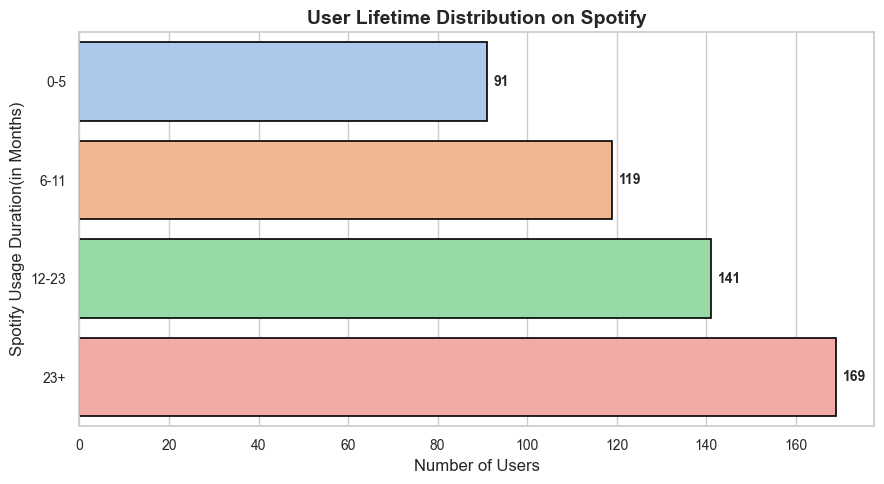

In [103]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))
ax = sns.countplot(
    data=spotify_data_raw,
    y='lifetime_usage_months',
    order=spotify_data_raw['lifetime_usage_months'].cat.categories,
    palette='pastel',
    hue='lifetime_usage_months',
    legend=False,
    edgecolor='black',
    linewidth=1.2
)
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10, fontweight='bold')
plt.title("User Lifetime Distribution on Spotify", fontsize=14, fontweight='bold')
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Spotify Usage Duration(in Months)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Most users have been on Spotify for over 2 years (23+)**
- The largest segment of 169 users  have used Spotify for more than 2 years.
- This suggests strong platform loyalty and long-term engagement among a substantial portion of users.

**A significant portion has used Spotify for 1–2 years (12–23 months)**
- 141 users fall into this category, indicating a healthy number of mid-term users.
- Combined with the 23+ group, this means over 60% of users have stuck with Spotify for more than 1 year.

**Newer users (under 1 year) still form a considerable base**
- 119 users (6–11 months) and 91 users (0–5 months) suggest steady growth and recent user acquisition.
- The platform continues to attract new adopters, which is vital for expansion and churn balance.

**Growth and retention are both evident**
- The chart reveals a well-distributed user lifecycle, with a healthy blend of long-term retention and new user onboarding.
- This balance is ideal for both revenue modeling (e.g., Premium conversion) and feature targeting (e.g., onboarding flows for new users vs loyalty perks for long-term users).

### Listening Devices

In [104]:
# Let us rename the spotify_usage_period column to 'music_output' for clarity
spotify_data_raw.rename(columns={'spotify_listening_device': 'music_output'}, inplace=True)

In [105]:

# Display unique values in the 'music_output' column
print(f"Unique Value: {spotify_data_raw['music_output'].unique()}")
# Count the number of null values in the 'music_output' column
print(f"Number of null values : {spotify_data_raw['music_output'].isnull().sum()}")
# Count value counts for the 'music_output' column
print(f"Value count for each age group  \n{spotify_data_raw['music_output'].value_counts(dropna=False)}")

Unique Value: ['Smart speakers or voice assistants' 'Computer or laptop'
 'Smartphone, Smart speakers or voice assistants' 'Smartphone'
 'Smartphone, Computer or laptop'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Wearable devices'
 'Smartphone, Computer or laptop, Wearable devices'
 'Computer or laptop, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Wearable devices'
 'Smartphone, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Smart speakers or voice assistants, Wearable devices']
Number of null values : 0
Value count for each age group  
music_output
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, C

The category values are too fragmented so we can reduce it to a few by looking at majority of users and merging similar categories

In [106]:
def simplify_music_output(val):
    val = val.strip()
    devices = [device.strip() for device in val.split(',')]
    
    if val == "Smartphone":
        return "Smartphone Only"
    elif val == "Computer or laptop":
        return "Laptop Only"
    elif val == "Smart speakers or voice assistants":
        return "Smart Speaker Only"
    elif val == "Wearable devices":
        return "Wearable Only"
    else:
        return "Multi-Device User"


In [ ]:

spotify_data_raw['music_output'] = spotify_data_raw['music_output'].apply(simplify_music_output)


In [ ]:

spotify_data_raw['music_output'] = spotify_data_raw['music_output'].astype('category')
print(spotify_data_raw['music_output'].value_counts())


music_output
Smartphone Only       300
Multi-Device User     115
Laptop Only            54
Smart Speaker Only     43
Wearable Only           8
Name: count, dtype: int64


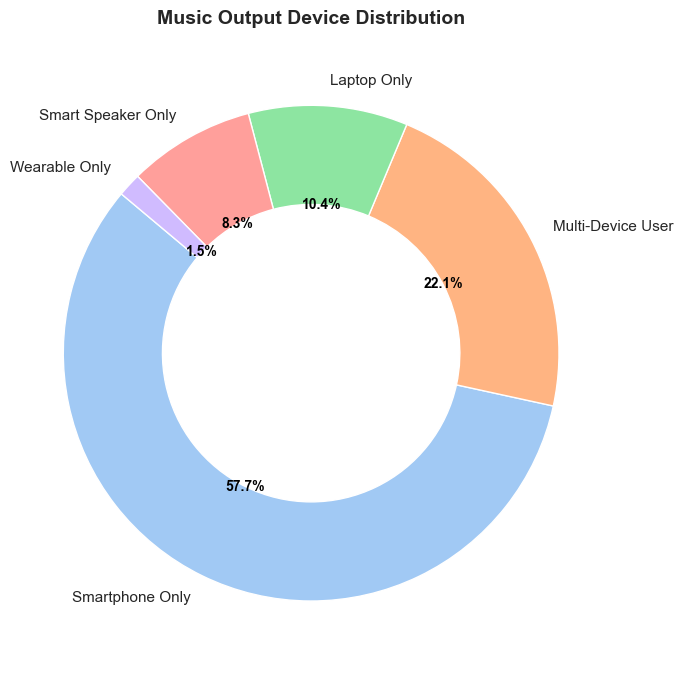

In [ ]:

device_counts = spotify_data_raw['music_output'].value_counts()

colors = sns.color_palette("pastel")

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops={'fontsize': 11}
)


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')


for text in texts:
    text.set_fontsize(11)

plt.title("Music Output Device Distribution", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Smartphone is the dominant music output device**
- Over 57% of respondents use Smartphone Only for Spotify, making it the primary listening device by a large margin.
- This confirms that Spotify is primarily a mobile-first platform among users, reinforcing the importance of mobile UX, app performance, and data-efficient streaming features.

**A significant share are multi-device users**
- Roughly 22% of users utilize multiple devices (e.g., combinations of smartphone, laptop, smart speaker, wearables).
- This group likely represents more engaged or flexible listeners, possibly Premium users with access across platforms.
- These users may respond better to cross-device syncing features and personalized device-based content suggestions.

**Laptop and smart speaker users make up smaller segments**
- 10.4% use laptop only, possibly students or desk-based users.
- 8.3% prefer smart speakers only, indicating a niche segment that values hands-free or home-integrated listening experiences.

**Wearable-only users are minimal**
- Just 1.5% rely solely on wearable devices, likely due to feature limitations or lower convenience for full control and navigation.
- These users may overlap with fitness-focused listeners who use Spotify during workouts.

Ways to make it better : 
- Optimize for mobile, as it's the core device for over half the user base.

- Retain and upsell multi-device users, who likely reflect more tech-savvy or premium-oriented behavior.

- Smart speaker and wearable integrations should be seen as supportive experiences rather than primary channels good for niche feature enhancements or targeted campaigns.

### Spotify Premium Subscription Plan


In [ ]:

print(f"Unique Value: {spotify_data_raw['spotify_subscription_plan'].unique()}")
print(f"Number of null values : {spotify_data_raw['spotify_subscription_plan'].isnull().sum()}")
print(f"Value count for each age group  \n{spotify_data_raw['spotify_subscription_plan'].value_counts(dropna=False)}")

Unique Value: ['Free (ad-supported)' 'Premium (paid subscription)']
Number of null values : 0
Value count for each age group  
spotify_subscription_plan
Free (ad-supported)            424
Premium (paid subscription)     96
Name: count, dtype: int64


Let us convert this to binary variables where 1 points to premium version and 0 to free version

In [ ]:

subscription_map = {
    "Free (ad-supported)": 0,
    "Premium (paid subscription)": 1
}
spotify_data_raw['spotify_subscription_plan'] = spotify_data_raw['spotify_subscription_plan'].map(subscription_map)
print(spotify_data_raw['spotify_subscription_plan'].value_counts())
print(spotify_data_raw['spotify_subscription_plan'].dtype)


spotify_subscription_plan
0    424
1     96
Name: count, dtype: int64
int64


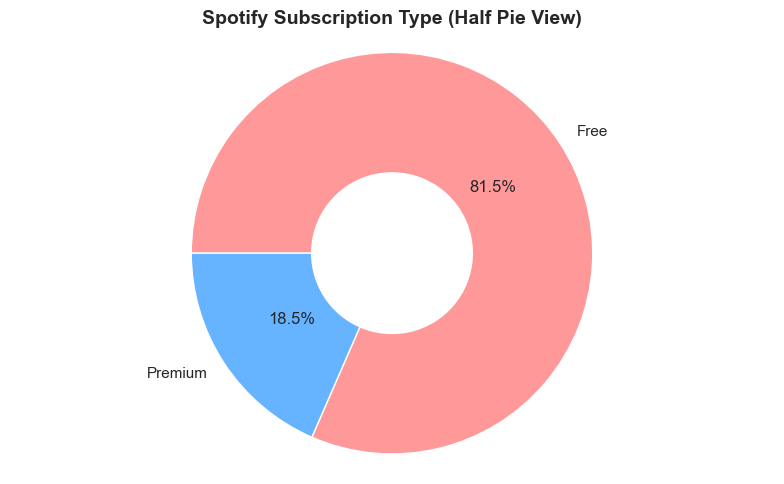

In [ ]:

counts = spotify_data_raw['spotify_subscription_plan'].value_counts().sort_index()
labels = ['Free', 'Premium']
colors = ['#FF9999', '#66B3FF']
sizes = counts.values

plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=180,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.6, edgecolor='white')
)

plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))  # donut hole
plt.title("Spotify Subscription Type (Half Pie View)", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Free users make up the overwhelming majority of respondents**
- As shown in the half pie chart, 81.5% of users are on the Free (ad-supported) plan.
- This suggests that the majority of users either prefer not to pay or don’t find sufficient value in upgrading to Premium.
- Spotify’s freemium model is widely adopted, likely due to accessibility, cost sensitivity, or casual listening behavior.

**Premium adoption is relatively low**
- Only 18.5% of users reported having a Premium (paid) subscription.
- This group represents a more engaged or loyal segment willing to pay for benefits such as ad-free listening, offline access, and higher audio quality.
- The Premium base may be smaller, but it’s financially more valuable to Spotify.

**Key business implications**
- There is a large potential upgrade market: over 4 out of 5 users are still on Free.
- Spotify could explore targeted conversion strategies e.g., time-limited trials, regional pricing, student/family plans to nudge Free users toward Premium.
- Marketing messages might focus on pain points in the Free tier, such as ads or skip limits, especially among high-frequency listeners.

### Spotify Premium Willingness

Let us split this into two columns :

1. premium_sub_interested
- Marks users who are willing to subscribe to Premium in the future (whether currently subscribed or not).
- Values: 1 = Interested, 0 = Not Interested

2. sub_retention
- Captures whether a current Premium user intends to continue their subscription.
- Values: 1 = Retention Likely, 0 = Might Churn or Not Premium



In [ ]:

spotify_data_raw['premium_sub_willingness'] = spotify_data_raw['premium_sub_willingness'].str.strip().str.lower()
# 1. Interested in subscribing or continuing
spotify_data_raw['premium_sub_interested'] = spotify_data_raw['premium_sub_willingness'].apply(
    lambda x: 1 if 'yes' in x else 0
)
# 2. Retention: currently a Premium user AND willing to continue
spotify_data_raw['sub_retention'] = spotify_data_raw.apply(
    lambda row: 1 if row['spotify_subscription_plan'] == 1 and 'yes' in row['premium_sub_willingness'] else 0,
    axis=1
)
print(spotify_data_raw[['premium_sub_willingness', 'spotify_subscription_plan', 'premium_sub_interested', 'sub_retention']].head())


  premium_sub_willingness  spotify_subscription_plan  premium_sub_interested  \
0                     yes                          0                       1   
1                     yes                          0                       1   
2                     yes                          0                       1   
3                      no                          0                       0   
4                      no                          0                       0   

   sub_retention  
0              0  
1              0  
2              0  
3              0  
4              0  


C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\2142203993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='premium_sub_interested', data=spotify_data_raw, palette='pastel', ax=axes[0, 0])
C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\2142203993.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_retention', data=spotify_data_raw, palette='coolwarm', ax=axes[1, 1])


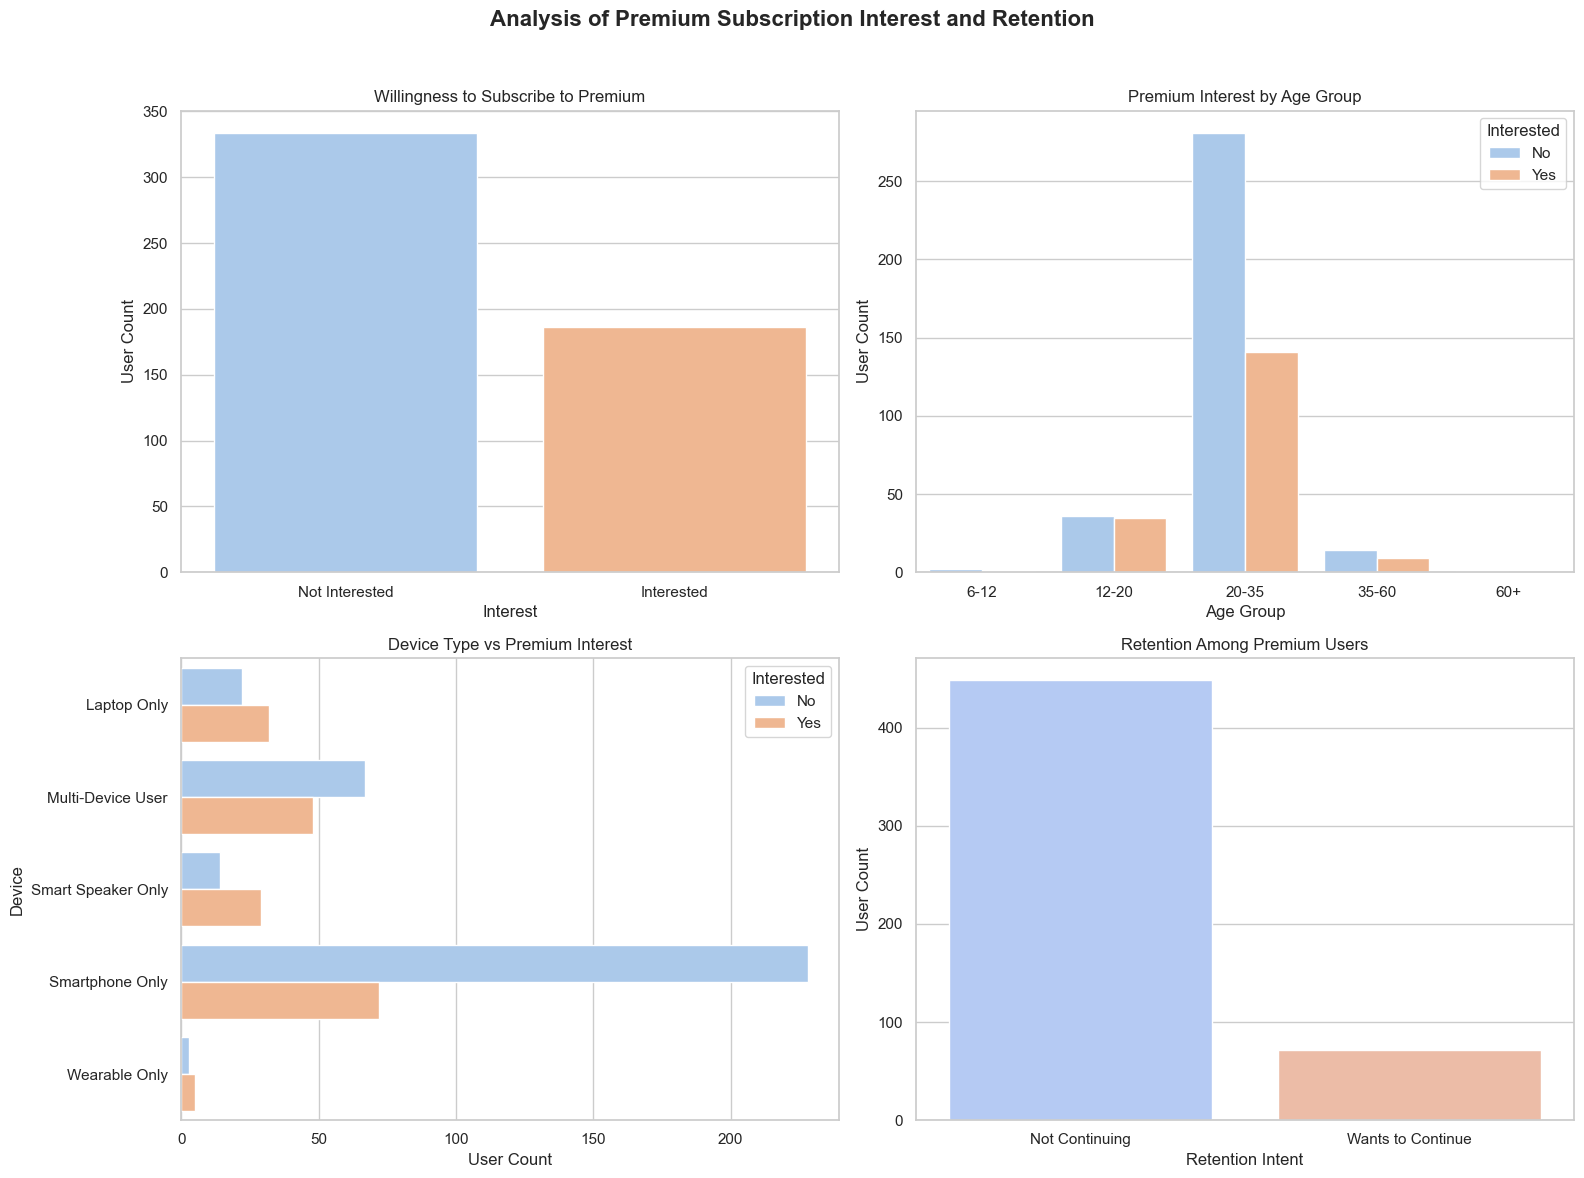

In [ ]:

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Analysis of Premium Subscription Interest and Retention", fontsize=16, fontweight='bold')

# Plot 1: Overall Willingness
sns.countplot(x='premium_sub_interested', data=spotify_data_raw, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Not Interested', 'Interested'])
axes[0, 0].set_title("Willingness to Subscribe to Premium")
axes[0, 0].set_xlabel("Interest")
axes[0, 0].set_ylabel("User Count")

# Plot 2: Willingness by Age
sns.countplot(data=spotify_data_raw, x='age', hue='premium_sub_interested', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title("Premium Interest by Age Group")
axes[0, 1].set_xlabel("Age Group")
axes[0, 1].set_ylabel("User Count")
axes[0, 1].legend(title='Interested', labels=['No', 'Yes'])

# Plot 3: Willingness by Device
sns.countplot(data=spotify_data_raw, y='music_output', hue='premium_sub_interested', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title("Device Type vs Premium Interest")
axes[1, 0].set_xlabel("User Count")
axes[1, 0].set_ylabel("Device")
axes[1, 0].legend(title='Interested', labels=['No', 'Yes'])

# Plot 4: Retention Among Premium Users
sns.countplot(x='sub_retention', data=spotify_data_raw, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Not Continuing', 'Wants to Continue'])
axes[1, 1].set_title("Retention Among Premium Users")
axes[1, 1].set_xlabel("Retention Intent")
axes[1, 1].set_ylabel("User Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Interpretation: Premium Subscription Interest and Retention


#### **Willingness to Subscribe to Premium**
- A **majority of users are not currently interested** in subscribing to Premium.
- However, nearly **one-third of users express interest**, indicating a **sizable opportunity for conversion** using well-targeted campaigns or offers.



#### **Premium Interest by Age Group**
- The **20–35 age group dominates** the dataset and shows the **highest interest** in Premium. This group is a **key target** for conversion.
- The **12–20 age group** also shows balanced interest and could be captured via **student discounts or lower-cost tiers**.
- Older groups have limited data but show minimal engagement or conversion potential.



#### **Device Type vs Premium Interest**
- **Smartphone-only users** are the largest group, but they show **lower Premium interest**  possibly casual users or cost-conscious listeners.
- **Multi-device users** have **higher Premium interest**, indicating deeper engagement and are more likely to find value in the Premium experience.
- **Smart speaker users** also show moderate interest, likely tied to **in-home usage**.



#### **Retention Among Premium Users**
- Most Premium users **do not express willingness to continue**, which highlights a **potential churn issue**.
- Very few Premium users are marked as **likely to retain**, signaling the need for **retention strategies** such as loyalty rewards, enhanced features, or personalized offers.


#### **Business Insights**
- Focus Premium upsell campaigns on the **20–35 age group** and **multi-device users**.
- Investigate the cause of **Premium churn** : is it pricing, value perception, or lack of engagement?
- **Smartphone-only users** represent volume but low intent :we need to convert them with **trial offers, bundles, or reduced ad frustration**.




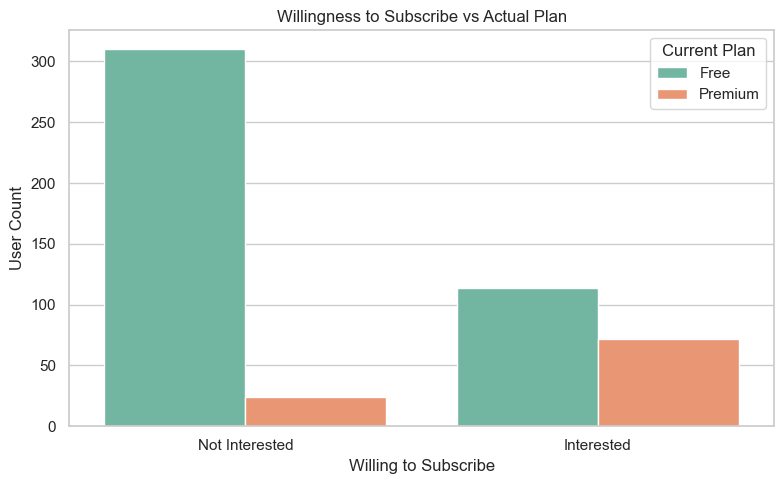

In [115]:
plt.figure(figsize=(8, 5))
sns.countplot(x='premium_sub_interested', hue='spotify_subscription_plan', data=spotify_data_raw, palette='Set2')
plt.xticks([0, 1], ['Not Interested', 'Interested'])
plt.title("Willingness to Subscribe vs Actual Plan")
plt.xlabel("Willing to Subscribe")
plt.ylabel("User Count")
plt.legend(title='Current Plan', labels=['Free', 'Premium'])
plt.tight_layout()
plt.show()


### Willingness to Subscribe vs Current Subscription Plan

This chart compares users' expressed interest in subscribing to Premium with their current subscription status (Free or Premium).



#### **Key Observations**
- A **majority of Free users are not interested** in Premium at the moment, indicating inertia or satisfaction with the free tier.
- However, a **significant portion of Free users do show interest** in upgrading and this represents a **high-potential conversion segment**.
- Among current Premium users, most are already marked as interested suggesting they either plan to retain or value their Premium access.



#### **Business Implications**
- **Free but interested users** are a clear opportunity. Spotify can:
  - Offer them **time-limited trials**, **discounted first-month offers**, or **personalized nudges**.
  - Target based on usage triggers (e.g., high daily usage, ad-skipping behavior).
- For **Premium users with no clear interest**, it’s important to explore:
  - What drives their hesitation to continue (pricing, feature value, alternatives).
  - How to retain them with engagement features like **exclusive content**, **year-end summaries**, or **loyalty rewards**.



Overall, bridging the gap between interest and action especially among Free users is a key lever for growth.


In [116]:
spotify_data_raw.drop(columns=['premium_sub_willingness'], inplace=True)


### Preferred Premium Plan

In [ ]:

spotify_data_raw['preffered_premium_plan'] = spotify_data_raw['preffered_premium_plan'].fillna('None')
spotify_data_raw['preferred_plan_type'] = spotify_data_raw['preffered_premium_plan'].apply(
    lambda x: x.split('-')[0].strip() if '-' in x else 'None'
)
spotify_data_raw['preferred_plan_cost'] = spotify_data_raw['preffered_premium_plan'].apply(
    lambda x: int(re.search(r'(\d+)', str(x)).group(1)) if re.search(r'(\d+)', str(x)) else None
)
spotify_data_raw['preferred_plan_type'] = spotify_data_raw['preferred_plan_type'].astype('category')
spotify_data_raw['preferred_plan_cost'] = pd.to_numeric(spotify_data_raw['preferred_plan_cost'])
spotify_data_raw.drop(columns=['preffered_premium_plan'], inplace=True)
spotify_data_raw[['preferred_plan_type', 'preferred_plan_cost']].head()

,preferred_plan_type,preferred_plan_cost
0,Family Plan,179.0
1,Individual Plan,119.0
2,Student Plan,59.0
3,None,NaN
4,None,NaN


C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\706186842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_data_raw, x='preferred_plan_type', palette='pastel')


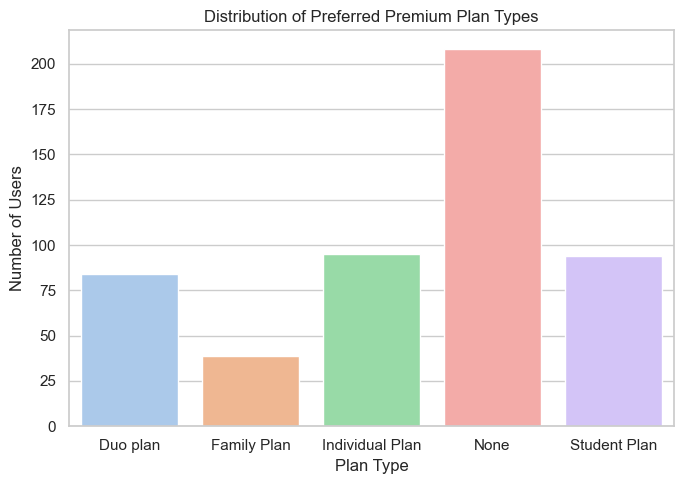

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\706186842.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data_raw, x='age', y='preferred_plan_cost', palette='coolwarm')


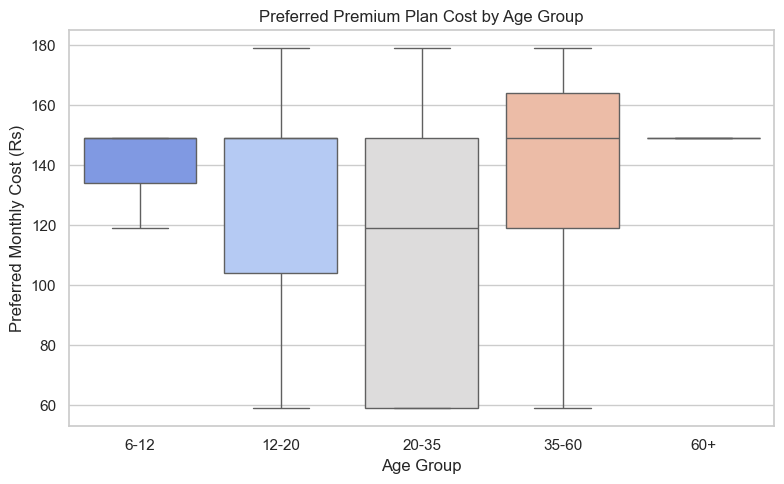

In [ ]:

sns.set_theme(style="whitegrid")

# Plot 1: Countplot of preferred plan type
plt.figure(figsize=(7, 5))
sns.countplot(data=spotify_data_raw, x='preferred_plan_type', palette='pastel')
plt.title("Distribution of Preferred Premium Plan Types")
plt.xlabel("Plan Type")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# Plot 2: Boxplot of cost preference by age group
plt.figure(figsize=(8, 5))
sns.boxplot(data=spotify_data_raw, x='age', y='preferred_plan_cost', palette='coolwarm')
plt.title("Preferred Premium Plan Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Preferred Monthly Cost (Rs)")
plt.tight_layout()
plt.show()


### Preferred Premium Plan Type and Cost Analysis



#### **1. Distribution of Preferred Premium Plan Types**
- The **Individual Plan** and **Student Plan** are the most commonly preferred among those who selected a plan, suggesting they appeal to both value-conscious and single-user segments.
- The **Duo Plan** also shows a notable share, likely among partners or small households.
- The **Family Plan** has the **lowest preference**, indicating fewer users are interested in or able to coordinate shared plans.
- A large number of users selected **"None"**, likely because they are unsure or not ready to commit. These users may benefit from targeted education or comparison features.


#### **2. Preferred Monthly Cost by Age Group**
- **12–20 and 20–35** age groups show the **widest cost range**, including lower median costs likely reflecting interest in Student Plans or discounts.
- Users aged **35–60** show **higher median willingness to pay**, likely due to greater purchasing power or preference for Individual/Family plans.
- The **6–12 and 60+** groups show narrow ranges, centered around mid-tier pricing. These may be supervised accounts or older users with simple usage needs.
- Overall, younger users are **more price-sensitive**, while middle-aged users demonstrate **higher and more stable cost expectations**.



####  Strategic Takeaways
- **Individual and Student Plans** should be emphasized in onboarding, especially for younger demographics.
- **"None" responders** represent a conversion opportunity — consider nudges, pricing tools, or recommendation engines to guide them.
- Price-based segmentation can help refine targeting: students (₹59), individuals (₹119), families (₹179).



### Listening Content,Genre and Time period

In [ ]:

categorical_cols = ['preferred_listening_content', 'fav_music_genre', 'music_time_slot']
spotify_data_raw[categorical_cols] = spotify_data_raw[categorical_cols].astype('category')

category_info = {
    col: spotify_data_raw[col].cat.categories.tolist()
    for col in categorical_cols
}
category_info


{'preferred_listening_content': ['Music', 'Podcast'],
 'fav_music_genre': ['All',
  'Classical & melody, dance',
  'Electronic/Dance',
  'Kpop',
  'Melody',
  'Old songs',
  'Pop',
  'Rap',
  'Rock',
  'classical',
  'trending songs random'],
 'music_time_slot': ['Afternoon', 'Morning', 'Night']}

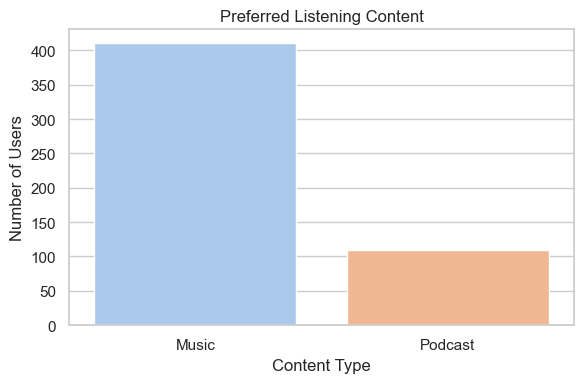

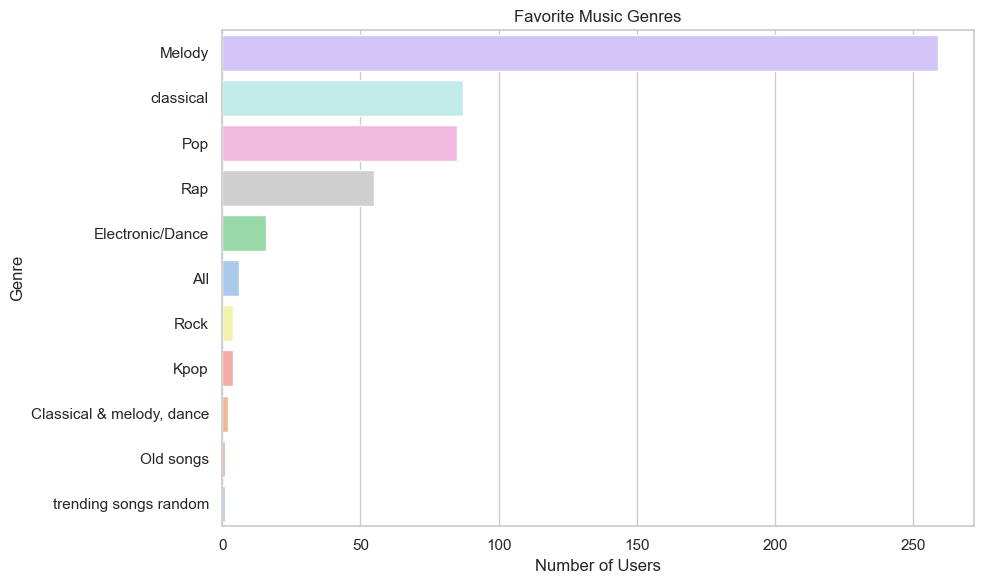

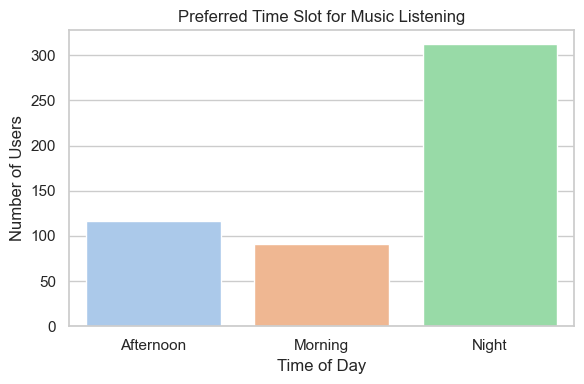

In [120]:
# Set plot style
sns.set_theme(style="whitegrid")

# Plot 1: Preferred Listening Content
plt.figure(figsize=(6, 4))
sns.countplot(data=spotify_data_raw, x='preferred_listening_content', hue='preferred_listening_content', palette='pastel', legend=False)
plt.title("Preferred Listening Content")
plt.xlabel("Content Type")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# Plot 2: Favorite Music Genre
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify_data_raw, y='fav_music_genre', order=spotify_data_raw['fav_music_genre'].value_counts().index, hue='fav_music_genre', palette='pastel', legend=False)
plt.title("Favorite Music Genres")
plt.xlabel("Number of Users")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Plot 3: Preferred Music Listening Time
plt.figure(figsize=(6, 4))
sns.countplot(data=spotify_data_raw, x='music_time_slot', hue='music_time_slot', palette='pastel', legend=False)
plt.title("Preferred Time Slot for Music Listening")
plt.xlabel("Time of Day")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


### Preferred Listening Content

#### Observations:
- **Music** is the overwhelmingly dominant choice among users (~80%+).
- **Podcasts** are preferred by a smaller segment.

#### Insights:
- Spotify remains a **music-centric platform** for most users.
- Podcast listeners are a **niche but potentially loyal** segment.
- **Recommendations**:
  - Bundle podcast content into music-based flows (e.g., smart playlists).
  - Target heavy music users or commuters with curated podcast trials.
  - Enhance podcast discovery for casual users who may be unaware of the offering.



### Favorite Music Genres

#### Observations:
- **Melody**, **Classical**, and **Pop** are the top 3 genres.
- **Rap**, **Electronic/Dance**, and niche inputs like “K-pop”, “Rock”, “Old songs”, etc., are less represented.
- Many **custom/long-tail entries** exist, including combined or vague categories like "Classical & melody, dance".

#### Insights:
- Strong preference for **softer, emotional, and traditional genres**.
- Suggests use cases like **studying, relaxing, or cultural music preferences**.
- **Recommendations**:
  - Emphasize curated playlists for focus, sleep, and mindfulness.
  - Consider NLP-driven category clustering to merge long-tail genre inputs for better personalization.
  - Tailor recommendations around regional genre inclinations or cultural patterns.



### Preferred Time Slot for Music Listening

#### Observations:
- **Night** is the most preferred listening time.
- **Afternoon** is moderate; **Morning** is the least active period.

#### Insights:
- Users tend to listen more during **evenings and nights** likely for relaxation, study, or personal time.
- Morning may be underused due to commuting, routine distractions, or lack of engagement.
- **Recommendations**:
  - Push **night-themed playlists** like chill, lo-fi, acoustic during evening hours.
  - Introduce **time-aware personalization**: surface different content types at night vs. day.
  - Use silent notification nudges or reminders during off-peak hours (like morning) to test engagement lift.





### Listening Frequency,Exploration Method and Recommendation Rating

In [ ]:
spotify_data_raw.rename(columns={
    'music_lis_frequency': 'music_listening_frequency',
    'music_expl_method': 'music_exploration_method',
    'music_recc_rating': 'music_recommendation_rating'
}, inplace=True)
unique_vals = spotify_data_raw['music_listening_frequency'].unique()
null_count = spotify_data_raw['music_listening_frequency'].isnull().sum()
value_counts = spotify_data_raw['music_listening_frequency'].value_counts(dropna=False)

print(f"Unique Values: {unique_vals}")
print(f"Number of Null Values: {null_count}")
print("Value Counts:\n", value_counts)

Unique Values: ['leisure time' 'Workout session' 'Study Hours, While Traveling'
 'Office hours, Workout session, leisure time' 'Office hours'
 'While Traveling, leisure time'
 'Office hours, While Traveling, Workout session'
 'Office hours, While Traveling'
 'Office hours, While Traveling, leisure time' 'Social gatherings '
 'While Traveling' 'While Traveling, Workout session, leisure time'
 'Study Hours' 'Study Hours, leisure time'
 'While Traveling, Workout session'
 'Study Hours, Workout session, leisure time'
 'Office hours, While Traveling, ' 'Workout session, leisure time'
 'While Traveling, Workout session, leisure time, Night time, when cooking'
 'Office hours, While Traveling, Workout session, leisure time'
 'Study Hours, While Traveling, Workout session, leisure time'
 'Office hours, Study Hours, While Traveling, Workout session, leisure time'
 'Office hours, leisure time' 'Study Hours, Workout session'
 'Office hours, Study Hours, While Traveling, leisure time'
 'Study Hours

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\3250568381.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=grouped_counts.index, x=grouped_counts.values, palette='pastel')


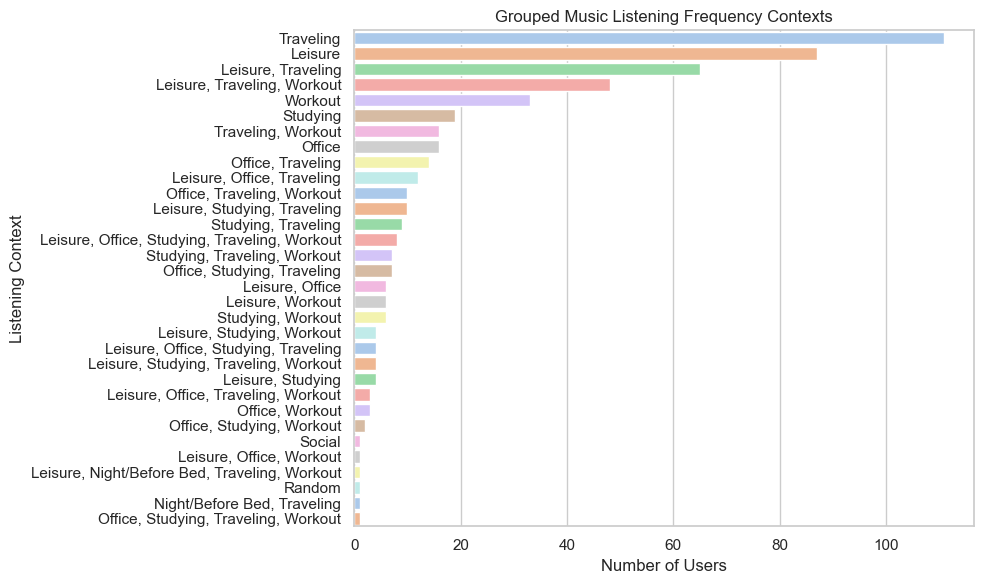

In [ ]:

def categorize_listening_context(val):
    val = str(val).lower()
    categories = set()
    if "travel" in val:
        categories.add("Traveling")
    if "leisure" in val:
        categories.add("Leisure")
    if "workout" in val:
        categories.add("Workout")
    if "study" in val:
        categories.add("Studying")
    if "office" in val:
        categories.add("Office")
    if "bed" in val or "night" in val:
        categories.add("Night/Before Bed")
    if "social" in val:
        categories.add("Social")
    if "random" in val:
        categories.add("Random")
    if not categories:
        categories.add("Other")
    return ", ".join(sorted(categories))

spotify_data_raw['music_listening_frequency_grouped'] = spotify_data_raw['music_listening_frequency'].apply(categorize_listening_context)


grouped_counts = spotify_data_raw['music_listening_frequency_grouped'].value_counts()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y=grouped_counts.index, x=grouped_counts.values, palette='pastel')
plt.title("Grouped Music Listening Frequency Contexts")
plt.xlabel("Number of Users")
plt.ylabel("Listening Context")
plt.tight_layout()
plt.show()


### Insights: Grouped Music Listening Frequency Contexts

#### Top Listening Contexts:
- **Traveling** is the most dominant context with over 100 users.
  - Indicates Spotify is a popular choice during commutes or on-the-go moments.
- **Leisure** follows closely, showing Spotify’s role in personal relaxation and downtime.

#### Multi-Context Listening:
- Many users report listening in **combined scenarios** such as:
  - `Leisure, Traveling`
  - `Leisure, Traveling, Workout`
  - `Studying, Traveling`
  - `Office, Traveling`
- This highlights that music consumption is **fluid and context-rich**, integrated into various moments of daily life.

#### Other Common Single Contexts:
- **Workout**: Suggests a demand for energetic, motivational playlists.
- **Studying**: Indicates usage for focus, concentration, or background calm.
- **Office hours**: Suggests possible overlap with productivity or ambient sound needs.

#### Rare/Niche Categories:
- Less frequent contexts include:
  - `Social gatherings`
  - `Night/Before Bed`
  - `Random`
- These represent **niche use cases** that may benefit from targeted content or campaigns.



#### Strategic Implications for Spotify

| Listening Context    | User Insight                                         | Suggested Strategy                                     |
|----------------------|------------------------------------------------------|--------------------------------------------------------|
| **Traveling**         | High engagement while commuting                     | Promote offline mode, low-data playlists               |
| **Leisure**           | Prime time for relaxation and exploration           | Surface mood-based and chill playlists                 |
| **Workout**           | Need for rhythmic, high-energy music                | Curate gym, cardio, and tempo-based playlists          |
| **Studying / Office** | Focused listening, often in background              | Offer ambient, lo-fi, instrumental recommendations     |
| **Multi-context users** | More frequent, diverse usage patterns             | Build time-aware dynamic mixes across contexts         |





In [ ]:

unique_vals_expl = spotify_data_raw['music_exploration_method'].unique()
null_count_expl = spotify_data_raw['music_exploration_method'].isnull().sum()
value_counts_expl = spotify_data_raw['music_exploration_method'].value_counts(dropna=False)

(unique_vals_expl, null_count_expl, value_counts_expl)


(array(['Playlists', 'recommendations, Playlists', 'Others',
        'recommendations', 'Playlists, Radio', 'recommendations, Others',
        'recommendations, Playlists, Radio', 'recommendations, Radio',
        'recommendations, Playlists, Others', 'Radio', 'Radio, Others',
        'Playlists, Others', 'Playlists, Radio, Others',
        'recommendations, Radio, Others',
        'recommendations,Others, Social media', 'Others, Social media',
        'recommendations, Playlists, Radio, Others', 'Others, Friends',
        'recommendations, Others, Social media', 'Others, Search'],
       dtype=object),
 np.int64(0),
 music_exploration_method
 recommendations                              113
 Playlists                                    112
 recommendations, Playlists                    86
 Others                                        55
 Radio                                         51
 Playlists, Radio                              18
 recommendations, Playlists, Others            18

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\1894393328.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=exploration_method_counts.index, x=exploration_method_counts.values, palette='pastel')


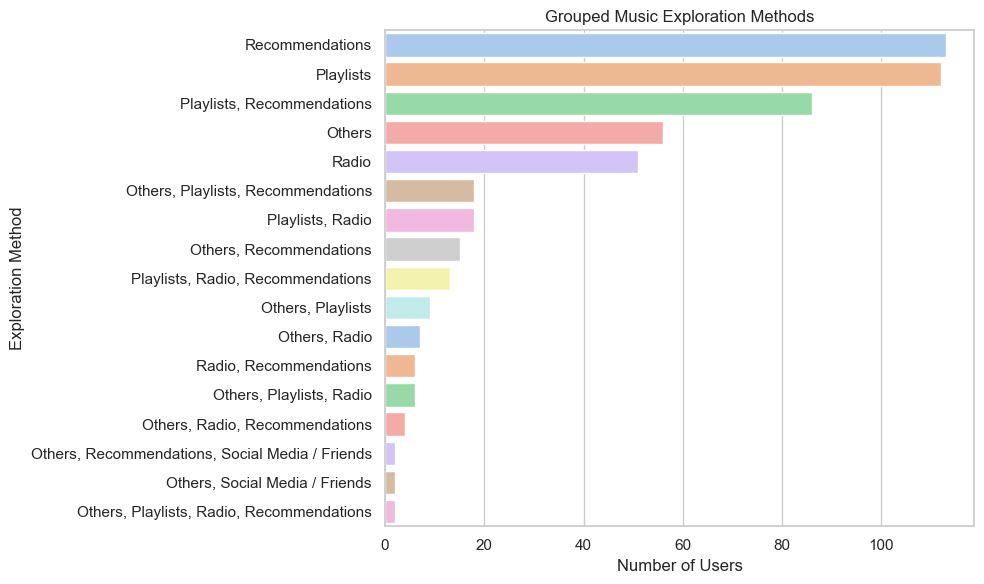

In [ ]:

def group_exploration_methods(val):
    val = str(val).lower()
    groups = set()
    if "recommendation" in val:
        groups.add("Recommendations")
    if "playlist" in val:
        groups.add("Playlists")
    if "radio" in val:
        groups.add("Radio")
    if "social" in val or "friend" in val:
        groups.add("Social Media / Friends")
    if "other" in val or "search" in val:
        groups.add("Others")
    if not groups:
        groups.add("Unspecified")
    return ", ".join(sorted(groups))

spotify_data_raw['music_exploration_method_grouped'] = spotify_data_raw['music_exploration_method'].apply(group_exploration_methods)

exploration_method_counts = spotify_data_raw['music_exploration_method_grouped'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=exploration_method_counts.index, x=exploration_method_counts.values, palette='pastel')
plt.title("Grouped Music Exploration Methods")
plt.xlabel("Number of Users")
plt.ylabel("Exploration Method")
plt.tight_layout()
plt.show()


### Insights: Grouped Music Exploration Methods

#### Key Observations:
- **Recommendations** and **Playlists** are the top discovery sources, each used by over 100 users.
  - Indicates strong reliance on Spotify’s **algorithmic suggestions** and **curated content**.
- Many users explore through **combinations** of methods:
  - `Playlists, Recommendations`
  - `Others, Playlists, Recommendations`
  - `Playlists, Radio, Recommendations`
  - Highlights a **multi-source exploration pattern** among users.

#### Supporting Exploration Modes:
- **Others** (manual search, undefined behaviors) and **Radio** are used by a moderate number of users.
  - Reflects more **traditional or passive discovery** preferences.

#### Underutilized Channels:
- **Social Media / Friends** appears in very few responses.
  - Suggests either **limited awareness** or weak integration of social discovery features.



### Strategic Recommendations for Spotify

| Exploration Method         | Insight                                          | Recommended Strategy                                      |
|----------------------------|--------------------------------------------------|-----------------------------------------------------------|
| **Recommendations**         | Most trusted and heavily used method             | Invest further in AI/ML for personalized discovery        |
| **Playlists**               | Key component of discovery journey               | Promote editorial, user-generated, and themed playlists   |
| **Multi-source users**      | Users explore through multiple entry points      | Make navigation seamless between methods (e.g., playlist → radio) |
| **Radio**                   | Used for background or passive listening         | Improve artist/genre-based radio stations                 |
| **Others**                  | Represents search/manual discovery               | Strengthen topic browsing, dynamic filters, and keyword suggestions |
| **Social / Friends**        | Very low engagement                              | Enhance social discovery with friend feeds, shares, or collaborative playlists |




In [ ]:

unique_vals_rating = spotify_data_raw['music_recommendation_rating'].unique()
null_count_rating = spotify_data_raw['music_recommendation_rating'].isnull().sum()
value_counts_rating = spotify_data_raw['music_recommendation_rating'].value_counts(dropna=False).sort_index()

(unique_vals_rating, null_count_rating, value_counts_rating)


(array([3, 2, 4, 5, 1]),
 np.int64(0),
 music_recommendation_rating
 1     14
 2     56
 3    190
 4    174
 5     86
 Name: count, dtype: int64)

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\1271990021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_rating.index, y=value_counts_rating.values, palette='pastel')


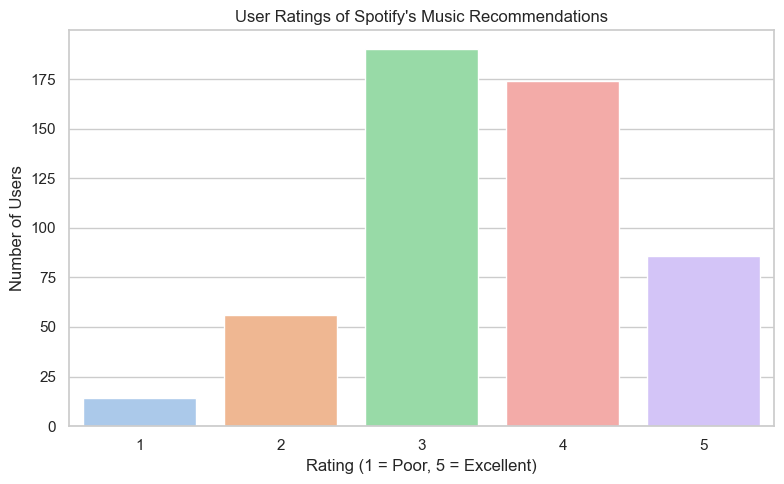

In [ ]:

plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts_rating.index, y=value_counts_rating.values, palette='pastel')
plt.title("User Ratings of Spotify's Music Recommendations")
plt.xlabel("Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


### Insights: User Ratings of Spotify's Music Recommendations

#### Key Observations:
- The most common rating is **3**, given by **190 users**, suggesting a **neutral sentiment**.
- **Rating 4** (174 users) indicates **moderate satisfaction**.
- Only **86 users rated 5**, implying relatively few users found the recommendations **excellent**.
- **Ratings 1 (14 users)** and **2 (56 users)** are low, but non-trivial — reflecting some **dissatisfaction**.



#### Interpretation:
- Around **83% of users rated between 3 and 5**, showing an **overall positive to neutral experience**.
- The **drop-off at rating 5** suggests users appreciate the system but **don’t see it as perfect**.
- Lower-end ratings (1 and 2) may indicate:
  - Poor personalization for niche or new users
  - Inconsistent results or relevance
  - Discovery fatigue from repetitive content



### Strategic Recommendations for Spotify

| Rating Level     | User Insight                                 | Suggested Strategy                                          |
|------------------|----------------------------------------------|-------------------------------------------------------------|
| **3 (Neutral)**   | Largest group sees recommendations as average | Run A/B tests to refine logic; introduce micro-feedback     |
| **4 (Good)**      | Nearly satisfied users                       | Enhance personalization depth (e.g. time-of-day or session-aware) |
| **5 (Excellent)** | Smaller loyal segment                        | Identify successful patterns and generalize to others       |
| **1–2 (Poor)**    | Unhappy or disengaged users                  | Detect profile cold-start, refine based on skip behavior    |
| **Overall**       | Room to grow recommendation satisfaction     | Offer more transparency and control (e.g. “Why this song?”) |




### Podast Genre and Variety Satisfaction Level

In [127]:

spotify_data_raw.rename(columns={
    'fav_pod_genre': 'favorite_podcast_genre',
    'pod_variety_satisfaction': 'podcast_variety_satisfaction'
}, inplace=True)

unique_pod_genres = spotify_data_raw['favorite_podcast_genre'].value_counts(dropna=False)
null_pod_genres = spotify_data_raw['favorite_podcast_genre'].isnull().sum()

unique_pod_satisfaction = spotify_data_raw['podcast_variety_satisfaction'].value_counts(dropna=False)
null_pod_satisfaction = spotify_data_raw['podcast_variety_satisfaction'].isnull().sum()

(unique_pod_genres, null_pod_genres, unique_pod_satisfaction, null_pod_satisfaction)


(favorite_podcast_genre
 NaN                                                 148
 Comedy                                              107
 Lifestyle and Health                                102
 Health and Fitness                                   78
 Sports                                               51
 Food and cooking                                     20
 Business                                              1
 Everything                                            1
 Informative stuff                                     1
 Dance and Relevant cases                              1
 Technology                                            1
 General knowledge                                     1
 Spiritual and devotional                              1
 Finance related and current affairs                   1
 Murder Mystery                                        1
 Political, informative, topics that interests me      1
 Novels                                                1
 Self h

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\833479307.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='pastel')


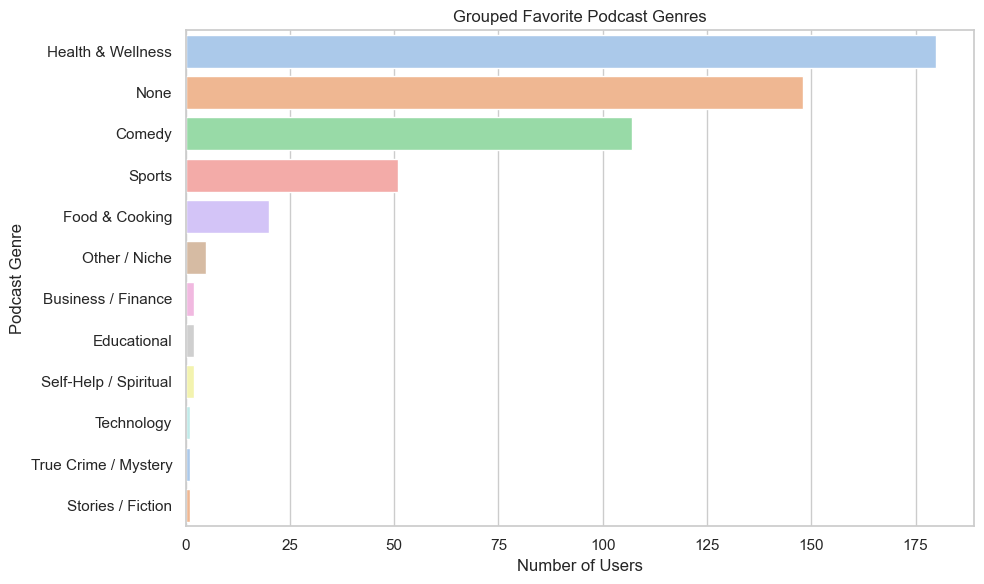

C:\Users\nisha\AppData\Local\Temp\ipykernel_27284\833479307.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='pastel')


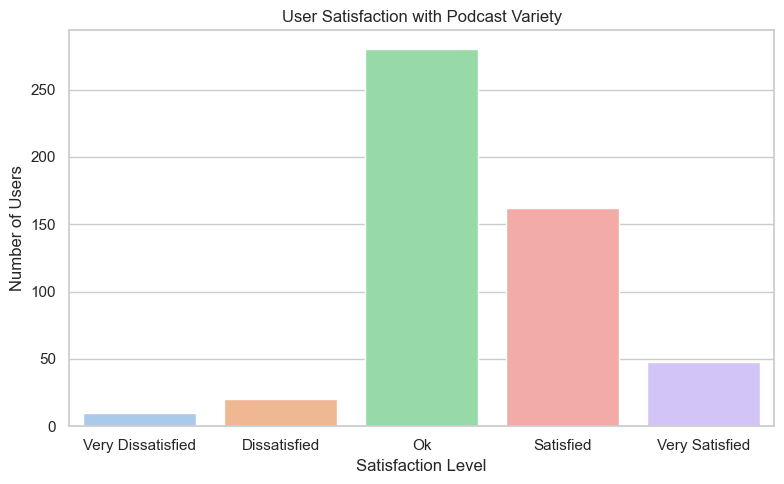

In [128]:

def simplify_podcast_genre(val):
    if pd.isna(val) or val.strip().lower() == "none":
        return "None"
    
    val = val.lower().strip()
    if "comedy" in val:
        return "Comedy"
    elif "health" in val or "lifestyle" in val:
        return "Health & Wellness"
    elif "sports" in val:
        return "Sports"
    elif "food" in val or "cook" in val:
        return "Food & Cooking"
    elif "education" in val or "knowledge" in val:
        return "Educational"
    elif "tech" in val:
        return "Technology"
    elif "murder" in val or "mystery" in val:
        return "True Crime / Mystery"
    elif "business" in val or "finance" in val:
        return "Business / Finance"
    elif "self" in val or "spiritual" in val:
        return "Self-Help / Spiritual"
    elif "story" in val or "novel" in val:
        return "Stories / Fiction"
    else:
        return "Other / Niche"


spotify_data_raw['favorite_podcast_genre_grouped'] = spotify_data_raw['favorite_podcast_genre'].apply(simplify_podcast_genre)


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
genre_counts = spotify_data_raw['favorite_podcast_genre_grouped'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='pastel')
plt.title("Grouped Favorite Podcast Genres")
plt.xlabel("Number of Users")
plt.ylabel("Podcast Genre")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
satisfaction_order = ["Very Dissatisfied", "Dissatisfied", "Ok", "Satisfied", "Very Satisfied"]
satisfaction_counts = spotify_data_raw['podcast_variety_satisfaction'].value_counts().reindex(satisfaction_order)
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='pastel')
plt.title("User Satisfaction with Podcast Variety")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


### Insights: Favorite Podcast Genres

#### Key Observations:
- **Health & Wellness** is the most preferred genre (includes "Lifestyle", "Health and Fitness").
- **Comedy** and **Sports** are the next most popular genres.
- A large portion of users selected **"None"**, indicating either no interest or uncertainty about podcast preferences.
- **Food & Cooking** has moderate interest.
- Niche genres like **Technology**, **Stories/Fiction**, and **True Crime** appear with very low but non-zero representation.

#### Interpretation:
- User podcast interest is centered around **well-being, entertainment, and sports**.
- The "None" group suggests either **non-listeners** or users unfamiliar with Spotify's podcast offerings.
- A long tail of niche interests exists — valuable for **personalized targeting**.



### Insights: Satisfaction with Podcast Variety

#### Key Observations:
- Most users rated podcast variety as **"Ok"** (~280 users).
- A decent number of users are **"Satisfied" (162)** or **"Very Satisfied" (48)**.
- **Dissatisfaction is low** as only 30 users rated it as "Dissatisfied" or "Very Dissatisfied".

#### Interpretation:
- The majority of users express **neutral to moderate satisfaction**.
- High "Ok" responses indicate an **opportunity to improve** perceived variety or recommendation quality.
- Spotify may be **delivering sufficient breadth**, but not **highlighting or curating it effectively**.



### Strategic Recommendations for Spotify

| Topic                     | Insight                                         | Suggested Strategy                                        |
|---------------------------|-------------------------------------------------|-----------------------------------------------------------|
| Genre Popularity          | Health, Comedy, Sports dominate                 | Prioritize these in promotions and home screen real estate |
| Niche Genres              | Low but present engagement                     | Use clustering or NLP to build "You might like" bundles   |
| Podcast Abstainers        | Many users selected "None"                     | Guide users with onboarding flows or genre samplers       |
| Satisfaction Levels       | Majority feel neutral or moderately positive   | Improve personalization, segment-specific curation        |
| Variety Opportunity       | Few very satisfied users                       | A/B test UI layouts or discovery mechanisms                |




### Creation of Processed Dataframe

In [ ]:

spotify_data_raw.columns.tolist()


['age',
 'gender',
 'lifetime_usage_months',
 'music_output',
 'spotify_subscription_plan',
 'preferred_listening_content',
 'fav_music_genre',
 'music_time_slot',
 'music_influencial_mood',
 'music_listening_frequency',
 'music_exploration_method',
 'music_recommendation_rating',
 'pod_lis_frequency',
 'favorite_podcast_genre',
 'preffered_pod_format',
 'pod_host_preference',
 'preffered_pod_duration',
 'podcast_variety_satisfaction',
 'premium_sub_interested',
 'sub_retention',
 'preferred_plan_type',
 'preferred_plan_cost',
 'music_listening_frequency_grouped',
 'music_exploration_method_grouped',
 'favorite_podcast_genre_grouped']

In [ ]:

grouped_column_map = {
    'music_listening_frequency': 'music_listening_frequency_grouped',
    'music_exploration_method': 'music_exploration_method_grouped',
    'favorite_podcast_genre': 'favorite_podcast_genre_grouped'
}


final_selected_columns = [
    col for col in [
        'age',
        'gender',
        'lifetime_usage_months',
        'music_output',
        'spotify_subscription_plan',
        'preferred_listening_content',
        'fav_music_genre',
        'music_time_slot',
        'music_influencial_mood',
        # 'music_listening_frequency',               # removed
        # 'music_exploration_method',               # removed
        'music_recommendation_rating',
        # 'favorite_podcast_genre',                 # removed
        'podcast_variety_satisfaction',
        'premium_sub_interested',
        'sub_retention',
        'preferred_plan_type',
        'preferred_plan_cost',
        'music_listening_frequency_grouped',
        'music_exploration_method_grouped',
        'favorite_podcast_genre_grouped'
    ]
]


spotify_data_processed = spotify_data_raw[final_selected_columns].copy()

In [ ]:
# Save the cleaned dataset to a new Excel file
# output_file = "../datasets/processed/spotify_data_cleaned.xlsx"
# spotify_data_processed.to_excel(output_file, index=False)
# print(f"Processed dataset saved to: {output_file}")

### Correlation Heatmap for Numeric/Ordinal Variables

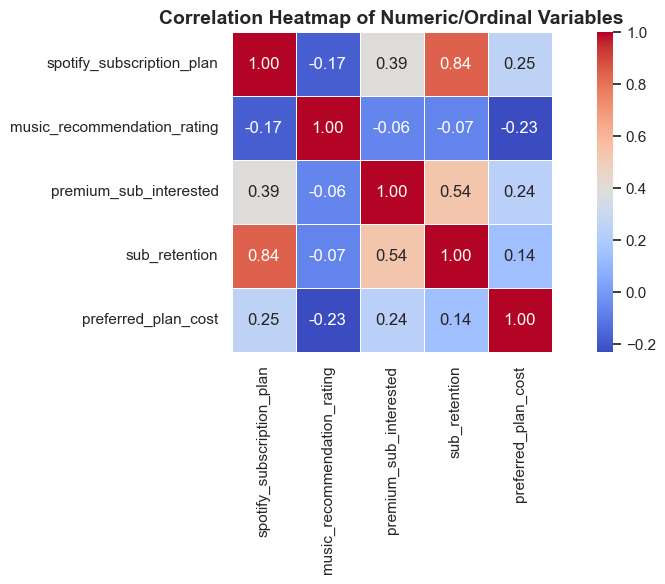

,spotify_subscription_plan,music_recommendation_rating,premium_sub_interested,sub_retention,preferred_plan_cost
spotify_subscription_plan,1.00,-0.17,0.39,0.84,0.25
music_recommendation_rating,-0.17,1.00,-0.06,-0.07,-0.23
premium_sub_interested,0.39,-0.06,1.00,0.54,0.24
sub_retention,0.84,-0.07,0.54,1.00,0.14
preferred_plan_cost,0.25,-0.23,0.24,0.14,1.00


In [133]:

import pandas as pd
spotify_data_processed = pd.read_excel("../datasets/processed/spotify_data_cleaned.xlsx")
numeric_cols = spotify_data_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation_matrix = spotify_data_processed[numeric_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numeric/Ordinal Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
correlation_matrix.round(2)


### Correlation Heatmap Summary

#### Key Insights:
- `spotify_subscription_plan` is strongly correlated with `sub_retention` (0.84)
- `premium_sub_interested` is moderately correlated with both:
  - `sub_retention` (0.54)
  - `spotify_subscription_plan` (0.39)
- `preferred_plan_cost` shows mild correlation with:
  - `spotify_subscription_plan` (0.25)
  - `premium_sub_interested` (0.24)
- `music_recommendation_rating` has weak or negative correlations with most variables

#### Conclusion:
- No multicollinearity issues
- Good signal from subscription-related and plan-related features



In [ ]:
# Chi-Square Test for Categorical Predictors vs Subscription Targets


# Define target variables 
target_vars = ['spotify_subscription_plan', 'premium_sub_interested', 'sub_retention']

# Define high-level categorical predictors to test against the targets
categorical_predictors = [
    'age',
    'gender',
    'lifetime_usage_months',
    'music_output',
    'preferred_listening_content',
    'fav_music_genre',
    'music_time_slot',
    'music_influencial_mood',
    'preferred_plan_type',
    'favorite_podcast_genre_grouped'
]


chi2_results = []

# Run chi-square test for each predictor-target pair
for predictor in categorical_predictors:
    for target in target_vars:
        try:
            contingency = pd.crosstab(spotify_data_processed[predictor], spotify_data_processed[target])
            if contingency.shape[0] > 1 and contingency.shape[1] > 1:
                chi2, p, dof, expected = chi2_contingency(contingency)
                chi2_results.append({
                    'Predictor': predictor,
                    'Target': target,
                    'Chi2': round(chi2, 2),
                    'p-value': round(p, 4),
                    'Significant': 'Yes' if p < 0.05 else 'No'
                })
        except Exception as e:
            chi2_results.append({
                'Predictor': predictor,
                'Target': target,
                'Chi2': None,
                'p-value': None,
                'Significant': f'Error: {str(e)}'
            })


chi2_df = pd.DataFrame(chi2_results).drop_duplicates()
chi2_df.sort_values(by=['Target', 'Significant', 'p-value'], ascending=[True, True, True])


,Predictor,Target,Chi2,p-value,Significant
1,age,premium_sub_interested,7.35,0.1184,No
28,favorite_podcast_genre_grouped,premium_sub_interested,14.71,0.1430,No
4,gender,premium_sub_interested,2.24,0.3268,No
10,music_output,premium_sub_interested,54.10,0.0000,Yes
13,preferred_listening_content,premium_sub_interested,39.78,0.0000,Yes
16,fav_music_genre,premium_sub_interested,43.12,0.0000,Yes
22,music_influencial_mood,premium_sub_interested,61.34,0.0000,Yes
25,preferred_plan_type,premium_sub_interested,28.47,0.0000,Yes
7,lifetime_usage_months,premium_sub_interested,19.38,0.0002,Yes
19,music_time_slot,premium_sub_interested,15.63,0.0004,Yes


### Chi-Square Test

#### Overall Observations
- Several categorical features are significantly associated with subscription-related outcomes.
- This indicates strong potential for effective classification modeling.

#### Strong Predictors (p < 0.05)
- `music_output`, `preferred_listening_content`, `fav_music_genre`, `music_influencial_mood`, `preferred_plan_type`, `lifetime_usage_months`
- These are significant across most or all of:
  - `premium_sub_interested`
  - `spotify_subscription_plan`
  - `sub_retention`

#### Weak or Non-Significant Predictors
- `gender`, `favorite_podcast_genre_grouped`, `age` (for some targets), `music_time_slot` (for retention)
- These features may have limited predictive value but can be retained if needed.





### Analysis from Chi-Square Test
- The feature set contains multiple high-signal categorical variables.
- Dataset is well-suited for predictive modeling.

In [ ]:




df_model = spotify_data_processed.copy()


ordinal_map = {
    "Very Dissatisfied": 1,
    "Dissatisfied": 2,
    "Ok": 3,
    "Satisfied": 4,
    "Very Satisfied": 5
}
df_model["podcast_variety_satisfaction"] = df_model["podcast_variety_satisfaction"].map(ordinal_map)


cat_cols = df_model.select_dtypes(include='object').columns.tolist()

# Store mappings: text label -> encoded value
encoding_maps = {}

# Label encode each categorical column and record mappings
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    encoding_maps[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Convert mappings into a DataFrame for documentation
mapping_df = pd.DataFrame([
    {"Column": col, "Text Label": text, "Encoded Value": code}
    for col, mapping in encoding_maps.items()
    for text, code in mapping.items()
])

# View results
from IPython.display import display
display(df_model.head())         # Encoded dataset
display(mapping_df.head(10))     # Mapping reference


df_model.to_csv("../datasets/processed/spotify_model_data.csv", index=False)
mapping_df.to_csv("../datasets/processed/label_encoding_mappings.csv", index=False)


,age,gender,lifetime_usage_months,music_output,spotify_subscription_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_influencial_mood,music_recommendation_rating,podcast_variety_satisfaction,premium_sub_interested,sub_retention,preferred_plan_type,preferred_plan_cost,music_listening_frequency_grouped,music_exploration_method_grouped,favorite_podcast_genre_grouped
0,1,0,2,2,0,1,4,2,8,3,3,1,0,1,179.0,0,10,1
1,0,1,2,0,0,1,7,0,10,2,4,1,0,2,119.0,31,10,1
2,2,2,3,2,0,1,6,2,0,4,4,1,0,3,59.0,26,10,7
3,1,0,1,1,0,0,4,2,3,4,3,0,0,4,NaN,7,13,11
4,1,0,1,3,0,0,4,2,0,4,3,0,0,4,NaN,0,13,4


,Column,Text Label,Encoded Value
0,age,12-20,0
1,age,20-35,1
2,age,35-60,2
3,age,6-12,3
4,age,60+,4
5,gender,Female,0
6,gender,Male,1
7,gender,Others,2
8,lifetime_usage_months,0-5,0
9,lifetime_usage_months,12-23,1



### Spotify User Segmentation – EDA Summary

#### 1. User Demographics
- Majority of users fall in the **20–35** age group.
- **Female** users are the largest demographic.
- Most users have been on Spotify for **over 1 year**.

#### 2. Subscription Insights
- Only **18.5% of users are Premium**.
- A notable portion of Free users show **interest in subscribing**.
- **Retention intent is low** among Premium users, indicating potential churn.

#### 3. Behavioral Patterns
- Users primarily listen through **smartphones**.
- Most common listening contexts: **leisure time** and **while traveling**.
- **Music** is the dominant content type; podcasts are less frequent but more niche.
- Top music genres: **Melody**, **Classical**, and **Pop**.

#### 4. Plan Preferences
- **Individual** and **Student** plans are the most preferred.
- Younger users prefer **lower-cost** plans; older users are willing to pay more.

#### 5. Significant Predictors (Chi-Square + Correlation)
- Strong categorical predictors of subscription interest and retention:
  - `music_output`
  - `preferred_listening_content`
  - `fav_music_genre`
  - `music_influencial_mood`
  - `preferred_plan_type`
  - `lifetime_usage_months`
- **Gender** and **favorite_podcast_genre_grouped** are not statistically significant.

#### 6. Music Recommendation Feedback
- Majority rated recommendation quality as **"Ok" or "Satisfied"**.
- Very few users rated it as **"Very Satisfied"**, showing room for improvement.

#### 7. Processed Dataset Ready
- Final dataset includes grouped features, encoded variables, and is free of nulls.
- Ready for:
  - **Churn modeling** (`sub_retention`)
  - **Subscription interest modeling** (`premium_sub_interested`)
